# Série temporal ERA5

## Importamos bibliotecas necessárias

In [45]:
import sys
import pandas as pd
import numpy as np
import glob

## Adicione os arquivos .nc

Nesta parte adicionamos o caminho de todos os arquivos .nc usando **`glob`**.

In [46]:
files = sorted(glob.glob('../data/SSI_ERA5/era5*.nc'))
len(files)

5

In [47]:
print(files)

['../data/SSI_ERA5/era5_2010.nc', '../data/SSI_ERA5/era5_2011.nc', '../data/SSI_ERA5/era5_2012.nc', '../data/SSI_ERA5/era5_2013.nc', '../data/SSI_ERA5/era5_2014.nc']


Importamos a biblioteca **`xarray`**

In [48]:
import xarray as xr

Agora vamos ler todos os arquivos **.nc**

In [49]:
ds = xr.open_mfdataset(files)
ds

<xarray.Dataset>
Dimensions:    (latitude: 7, longitude: 19, time: 43824)
Coordinates:
  * longitude  (longitude) float32 -62.0 -61.75 -61.5 ... -58.0 -57.75 -57.5
  * latitude   (latitude) float32 -61.5 -61.75 -62.0 -62.25 -62.5 -62.75 -63.0
  * time       (time) datetime64[ns] 2010-01-01 ... 2014-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
    msl        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
    z          (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
    sf         (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
    sp         (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
    ssrd       (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
    strd       (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
    tcc        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(8760, 7, 19), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-12-23 04:16:18 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Vamos ver como os **.nc** estão organizados!!

### Nos dados de superfície ERA5 podemos converter a variável **Geopotencial** para **elevação**. Podemos encontrar essas informações e muito mais na [documentação](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation) do conjunto de dados.

Vamos selecionar a variável Geopotencial e um horário para exibição.

117.76751


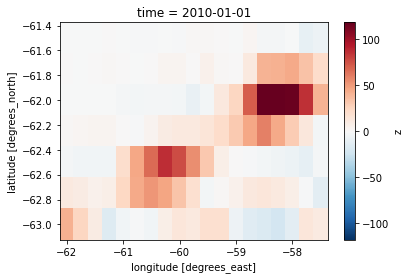

In [50]:
(ds['z'][0] / 9.80665).plot()
print((ds['z'][0].values / 9.80665).max())

Este é o DEM que eles usam para executar o modelo global para gerar os dados ERA5.

## Dados geográficos da nossa estação climática

In [51]:
## Lon, Lat, Elevação

AWS = [-58.613468, -62.235946, 194.5]

## Veja a localização da estação

In [52]:
from matplotlib import pyplot as plt
from cartopy.io.shapereader import Reader as ShapeReader
from cartopy.crs import PlateCarree

In [53]:
projection = PlateCarree()

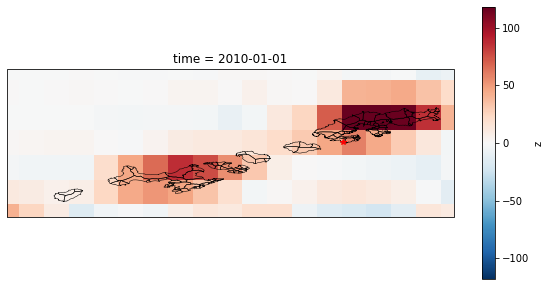

In [54]:
# Gere uma forma (defina seu tamanho (largura, altura) em polegadas) e eixos usando Cartopy
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=projection)

# Aqui definimos os limites de lon e lat da nossa figura
ax.set_extent([ds.longitude.min(), ds.longitude.max(), ds.latitude.min(), ds.latitude.max()], crs=projection)

# Podemos adicionar informações vetoriais como um shapefile usando ´add_geometries´
fname = '../data/shapefiles/SSI_all_fff_20221118.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.5, crs=projection)

(ds['z'][0] / 9.80665).plot(ax=ax)

ax.plot(AWS[0],AWS[1], 'r*')


## Seleção para um local 

In [55]:
ERA5_AWS = ds.sel(longitude=AWS[0], latitude= AWS[1], method='nearest')
ERA5_AWS

<xarray.Dataset>
Dimensions:    (time: 43824)
Coordinates:
    longitude  float32 -58.5
    latitude   float32 -62.25
  * time       (time) datetime64[ns] 2010-01-01 ... 2014-12-31T23:00:00
Data variables:
    u10        (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
    v10        (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
    d2m        (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
    t2m        (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
    msl        (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
    z          (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
    sf         (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
    sp         (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
    ssrd       (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
    strd       (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
    tcc        (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
    tp         (time) float32 dask.array<chunksize=(8760,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-12-23 04:16:18 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Convertemos para um **`dataframe`**

In [56]:
df_ERA5_AWS = ERA5_AWS.to_dataframe()
df_ERA5_AWS

,longitude,latitude,u10,v10,d2m,t2m,msl,z,sf,sp,ssrd,strd,tcc,tp
time,,,,,,,,,,,,,,
2010-01-01 00:00:00,-58.5,-62.25,-2.059832,-0.916028,269.138794,272.044464,99329.218750,581.507019,9.233691e-05,98590.843750,2.910788e+05,9.840484e+05,1.000000,9.439094e-05
2010-01-01 01:00:00,-58.5,-62.25,-2.048415,-1.613193,269.405060,271.938660,99351.656250,581.507019,1.776837e-04,98611.968750,9.243750e+04,1.004156e+06,0.989929,1.869401e-04
2010-01-01 02:00:00,-58.5,-62.25,-1.658116,-1.964391,269.574921,271.790314,99348.242188,581.507019,2.221722e-04,98609.210938,8.200125e+03,9.812786e+05,0.980010,2.331572e-04
2010-01-01 03:00:00,-58.5,-62.25,-1.129392,-2.011489,269.647034,271.707825,99335.312500,581.507019,2.634638e-04,98596.781250,0.000000e+00,1.002599e+06,0.990051,2.746546e-04
2010-01-01 04:00:00,-58.5,-62.25,-0.618506,-1.804491,269.719177,271.682678,99315.312500,581.507019,2.505670e-04,98576.210938,0.000000e+00,1.012524e+06,0.989990,2.537045e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-58.5,-62.25,6.732086,0.915616,270.156586,273.436584,101255.195312,581.507019,1.291046e-07,100507.640625,2.578226e+06,8.740254e+05,0.616819,0.000000e+00
2014-12-31 20:00:00,-58.5,-62.25,6.939195,0.744730,270.579041,273.426117,101267.648438,581.507019,3.441237e-07,100520.226562,2.102700e+06,9.070089e+05,0.608396,0.000000e+00
2014-12-31 21:00:00,-58.5,-62.25,7.195646,0.534956,270.933350,273.449371,101280.664062,581.507019,4.301546e-07,100533.750000,1.798212e+06,8.715449e+05,0.539057,0.000000e+00


## Converter de UTC para hora local (LT)

In [57]:
df_ERA5_AWS_LT = df_ERA5_AWS.tz_localize('utc').tz_convert('America/Lima')
df_ERA5_AWS_LT

,longitude,latitude,u10,v10,d2m,t2m,msl,z,sf,sp,ssrd,strd,tcc,tp
time,,,,,,,,,,,,,,
2009-12-31 19:00:00-05:00,-58.5,-62.25,-2.059832,-0.916028,269.138794,272.044464,99329.218750,581.507019,9.233691e-05,98590.843750,2.910788e+05,9.840484e+05,1.000000,9.439094e-05
2009-12-31 20:00:00-05:00,-58.5,-62.25,-2.048415,-1.613193,269.405060,271.938660,99351.656250,581.507019,1.776837e-04,98611.968750,9.243750e+04,1.004156e+06,0.989929,1.869401e-04
2009-12-31 21:00:00-05:00,-58.5,-62.25,-1.658116,-1.964391,269.574921,271.790314,99348.242188,581.507019,2.221722e-04,98609.210938,8.200125e+03,9.812786e+05,0.980010,2.331572e-04
2009-12-31 22:00:00-05:00,-58.5,-62.25,-1.129392,-2.011489,269.647034,271.707825,99335.312500,581.507019,2.634638e-04,98596.781250,0.000000e+00,1.002599e+06,0.990051,2.746546e-04
2009-12-31 23:00:00-05:00,-58.5,-62.25,-0.618506,-1.804491,269.719177,271.682678,99315.312500,581.507019,2.505670e-04,98576.210938,0.000000e+00,1.012524e+06,0.989990,2.537045e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 14:00:00-05:00,-58.5,-62.25,6.732086,0.915616,270.156586,273.436584,101255.195312,581.507019,1.291046e-07,100507.640625,2.578226e+06,8.740254e+05,0.616819,0.000000e+00
2014-12-31 15:00:00-05:00,-58.5,-62.25,6.939195,0.744730,270.579041,273.426117,101267.648438,581.507019,3.441237e-07,100520.226562,2.102700e+06,9.070089e+05,0.608396,0.000000e+00
2014-12-31 16:00:00-05:00,-58.5,-62.25,7.195646,0.534956,270.933350,273.449371,101280.664062,581.507019,4.301546e-07,100533.750000,1.798212e+06,8.715449e+05,0.539057,0.000000e+00


In [58]:
import datetime
dt1_list = []
for i in range(len(df_ERA5_AWS_LT)):
    dt1_list.append(datetime.datetime(df_ERA5_AWS_LT.index[i].year,
                  df_ERA5_AWS_LT.index[i].month,
                  df_ERA5_AWS_LT.index[i].day,                    
                  df_ERA5_AWS_LT.index[i].hour,
                  df_ERA5_AWS_LT.index[i].minute,
                  df_ERA5_AWS_LT.index[i].second))


df_ERA5_AWS_LT.index = dt1_list
df_ERA5_AWS_LT.index.name = 'Datetime'

In [59]:
df_ERA5_AWS_LT

,longitude,latitude,u10,v10,d2m,t2m,msl,z,sf,sp,ssrd,strd,tcc,tp
Datetime,,,,,,,,,,,,,,
2009-12-31 19:00:00,-58.5,-62.25,-2.059832,-0.916028,269.138794,272.044464,99329.218750,581.507019,9.233691e-05,98590.843750,2.910788e+05,9.840484e+05,1.000000,9.439094e-05
2009-12-31 20:00:00,-58.5,-62.25,-2.048415,-1.613193,269.405060,271.938660,99351.656250,581.507019,1.776837e-04,98611.968750,9.243750e+04,1.004156e+06,0.989929,1.869401e-04
2009-12-31 21:00:00,-58.5,-62.25,-1.658116,-1.964391,269.574921,271.790314,99348.242188,581.507019,2.221722e-04,98609.210938,8.200125e+03,9.812786e+05,0.980010,2.331572e-04
2009-12-31 22:00:00,-58.5,-62.25,-1.129392,-2.011489,269.647034,271.707825,99335.312500,581.507019,2.634638e-04,98596.781250,0.000000e+00,1.002599e+06,0.990051,2.746546e-04
2009-12-31 23:00:00,-58.5,-62.25,-0.618506,-1.804491,269.719177,271.682678,99315.312500,581.507019,2.505670e-04,98576.210938,0.000000e+00,1.012524e+06,0.989990,2.537045e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 14:00:00,-58.5,-62.25,6.732086,0.915616,270.156586,273.436584,101255.195312,581.507019,1.291046e-07,100507.640625,2.578226e+06,8.740254e+05,0.616819,0.000000e+00
2014-12-31 15:00:00,-58.5,-62.25,6.939195,0.744730,270.579041,273.426117,101267.648438,581.507019,3.441237e-07,100520.226562,2.102700e+06,9.070089e+05,0.608396,0.000000e+00
2014-12-31 16:00:00,-58.5,-62.25,7.195646,0.534956,270.933350,273.449371,101280.664062,581.507019,4.301546e-07,100533.750000,1.798212e+06,8.715449e+05,0.539057,0.000000e+00


# Salvando os dados

In [60]:
df_ERA5_AWS_LT.to_csv('../data/ERA5_AWS_LT.csv', sep='\t')
df_ERA5_AWS.to_csv('../data/ERA5_AWS_UTC.csv', sep='\t')